# Digital Xchange 25.05.2019 - Deep Learning **mit** Keras und TensorFlow

## Problemstellung - Handgeschriebene Zahlen erkennen

Die Aufgabe, handgeschriebene Zahlen anhand eines Graustufenbilds zu erkennen, ist ein sehr komplexes Problem für einen Computer. Für ein solches Problem wird Deep Learning aka ein Neuronales Netz benötigt.

## Setup in Google Colab

Die Berechnungen dieses Dokuments sind sehr rechenaufwändig. Daher bietet es sich an eine Funktion von Google Colab zu nutzen. Eine GPU kann über

*   Edit -> Notebook Preferences -> Hardware acceleration -> GPU

ausgewählt werden.

In [21]:
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


## Das MNIST Data Set

Das MNIST Data Set besteht aus handgeschriebenen Zahlen 0 bis 9. Die folgende Zelle zeigt einige zufällige Einträge des Datensatzes.

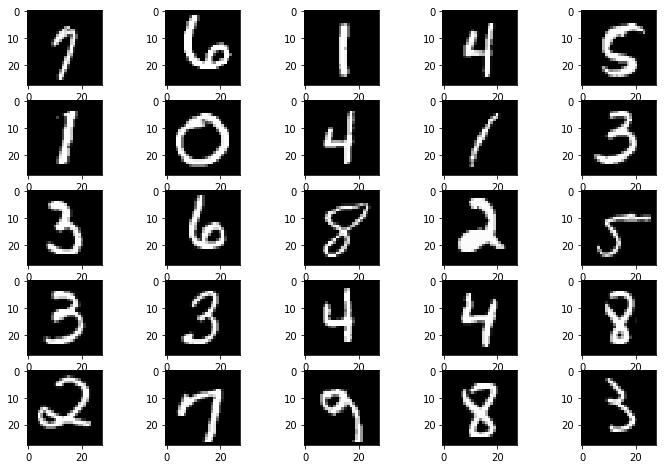

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.rcParams['figure.figsize'] = (12, 8)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard

(x_train, y_train), (x_test, y_test) = mnist.load_data()

offset = random.randint(1,59000)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i + offset], cmap='gray', interpolation='none')

## Normalisieren und Formattieren der Daten

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28**2)
x_test = x_test.reshape(x_test.shape[0], 28**2)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


## Trainieren des Neuronales Netzes mit Keras

In [0]:
# Die Lernrate beeinflusst wie stark die Werte bei einem Parameterupdate
# verändert werden. Große Lernraten lassen den Fehler stark schwanken und
# kleine Lernraten sorgen für ein zu langsames Lernen.
learning_rate = 0.01

# Die batch_size ist die Anzahl der Trainingsbeispiele die sich das Netzwerk
# anguckt, bevor ein Parameterupdate durchgeführt wird.
batch_size = 128

# Die Anzahl der Epochen bestimmt wie oft die gesamten Daten gelernt werden
# sollen. Bei zu wenig Epochen hat das Netz nicht genug lernen können. Bei
# zu vielen Epochen wird das Netzwerk stagnieren und im schlimmsten Fall
# die Trainingsdaten auswendig lernen.
epochs = 10

In [25]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(28**2,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(lr=learning_rate),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [26]:
tensorboard_callback = TensorBoard(log_dir='./log', histogram_freq=0,
                         write_graph=True,
                         write_grads=False,
                         batch_size=batch_size,
                         write_images=True)

history = model.fit(x=x_train, y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2532 - acc: 0.9237 - val_loss: 0.1102 - val_acc: 0.9656
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0900 - acc: 0.9722 - val_loss: 0.1205 - val_acc: 0.9647
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0678 - acc: 0.9785 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0490 - acc: 0.9841 - val_loss: 0.0946 - val_acc: 0.9707
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0404 - acc: 0.9871 - val_loss: 0.0759 - val_acc: 0.9767
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0367 - acc: 0.9879 - val_loss: 0.0908 - val_acc

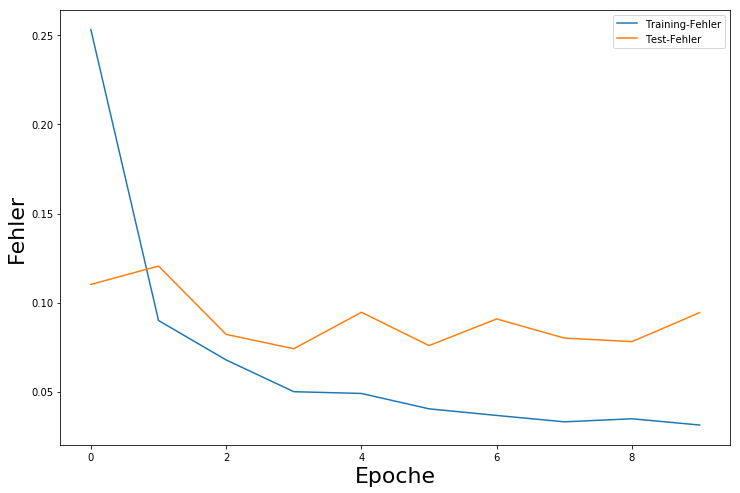

In [27]:
plt.xlabel('Epoche', fontsize=22)
plt.ylabel('Fehler', fontsize=22)
plt.plot(history.history['loss'], label="Training-Fehler")
plt.plot(history.history['val_loss'], label="Test-Fehler")
plt.legend(loc="upper right")
plt.show()

## Computational Graph

Klicken Sie auf den Link am Ende der Zelle nachdem Sie sie ausgeführt haben. Unter dem Tab Graph können Sie den Computational Graph sehen.

In [28]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

print("Click the link above this message!")

--2019-05-22 09:59:29--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.173.6.94, 52.73.9.93, 34.206.36.121, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.173.6.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  39.5MB/s    in 0.4s    

2019-05-22 09:59:30 (39.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://508aa55b.ngrok.io
Click the link above this message!


## Güte des Neuronalem Netzes

In [29]:
accuracy = model.evaluate(x_train, y_train, verbose=0)[1]
print("Training accuracy: " + str(accuracy * 100) + "%")

accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print("Testing accuracy: " + str(accuracy * 100) + "%")

Training accuracy: 98.93833333333333%
Testing accuracy: 97.5%


## Klassifizierung eines zufälligen Zeichens

Target class: 4
Predicted class: 4
The network correctly predicted the class!


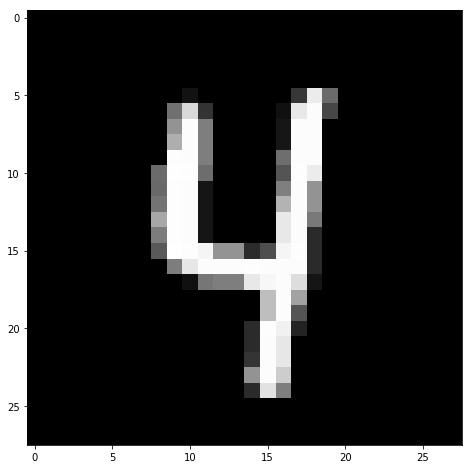

In [36]:
import random

random_index = random.randint(0, len(x_test))
random_image = x_test[random_index]
random_target = y_test[random_index] 
random_prediction = model.predict(x=random_image.reshape(-1, 28**2))

target_class = np.argmax(random_target)
predicted_class = np.argmax(random_prediction)

print("Target class: " + str(target_class))
print("Predicted class: " + str(predicted_class))
if target_class == predicted_class:
  print("The network correctly predicted the class!")
else:
  print("The network couldn't predict the class!")

plt.imshow(random_image.reshape(28,28), cmap='gray', interpolation='none')